**checks the data types of each column and applies appropriate transformations accordingly**

In [86]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
def preprocess_data(data):
    # Separate the features (X) and the target variable (y)
    X = data.drop('gender', axis=1)
    y = data['gender']

    # Handle NaN or 0 values in numeric columns
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X[numeric_cols] = X[numeric_cols].replace(0, np.nan)
    imputer = SimpleImputer(strategy='mean')
    X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

    # Convert text data to numeric representations
    text_cols = X.select_dtypes(include=['object']).columns
    for col in text_cols:
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

    return X, y




In [109]:
def encode_text_column_using_label_encoding(df, column_name):
    """
    Encode a text column in a dataframe using label encoding.
    
    Parameters:
    df (pandas dataframe): The dataframe to encode
    column_name (str): The name of the text column to encode
    
    Returns:
    pandas dataframe: The updated dataframe with the encoded column
    """
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode the column using label encoding
    encoded = le.fit_transform(df[column_name])
    
    # Replace the original column with the encoded values
    df[column_name] = encoded
    
    # Return the updated dataframe
    return df


In [110]:
# Read the data from the CSV file
data = pd.read_csv('gender_classification_v7.csv')
column_names = data.columns.tolist()
print(column_names)

['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']


In [111]:
data = encode_text_column_using_label_encoding(data, "gender")

In [112]:
X, y = preprocess_data(data)

In [113]:
# Split the data into training and testing sets
train_size = 0.8 # Training set size (80%)
train_samples = int(len(X) * train_size)

X_train = X[:train_samples]
y_train = y[:train_samples]
X_test = X[train_samples:]
y_test = y[train_samples:]

In [114]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [115]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Create the Naïve Bayes classifier
naive_bayes = GaussianNB()

# Fit the classifier on the data
naive_bayes.fit(X, y)

# Make predictions on the data
y_pred = naive_bayes.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F-measure
f_measure = f1_score(y, y_pred, average='weighted')
print("F-measure:", f_measure)

# Create a confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.6960607878424315
Recall: 0.6960607878424315
F-measure: 0.6952338527863325
Confusion Matrix:
[[1871  630]
 [ 890 1610]]


Accuracy: 0.6960607878424315


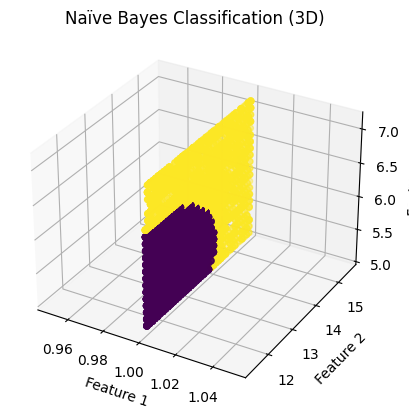

In [120]:
from mpl_toolkits.mplot3d import Axes3D

# Encode categorical variables
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Create the Naïve Bayes classifier
naive_bayes = GaussianNB()

# Fit the classifier on the data
naive_bayes.fit(X, y)

# Make predictions on the data
y_pred = naive_bayes.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Create a 3D scatter plot for three features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y_pred)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Naïve Bayes Classification (3D)")

plt.show()
